In [1]:
import pandas as pd
import os

# Task #1: Concat the 12 months of sales data into a single csv file

In [3]:
all_months_data = pd.DataFrame()
files = [file for file in os.listdir("C:/Users/ujjwa/OneDrive/Desktop/DBDA-PROJECT/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]

for file in files:
    df = pd.read_csv("C:/Users/ujjwa/OneDrive/Desktop/DBDA-PROJECT/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
   
all_months_data.to_csv("C:/Users/ujjwa/OneDrive/Desktop/DBDA-PROJECT/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/all_data.csv",index=False)

In [4]:
all_data = pd.read_csv("C:/Users/ujjwa/OneDrive/Desktop/DBDA-PROJECT/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/all_data.csv")

In [5]:
all_data.head()
all_data.shape

(560550, 6)

In [6]:
all_data.isnull().sum()

Order ID            1635
Product             1635
Quantity Ordered    1635
Price Each          1635
Order Date          1635
Purchase Address    1635
dtype: int64

# clean up data

In [7]:
all_data_drop =all_data.copy() 

In [8]:
all_data_drop[all_data_drop.isna().any(axis=1)]

all_data=all_data.dropna()


In [9]:
all_data.shape

(558915, 6)

In [10]:
all_data = all_data[all_data["Order Date"].str[0:2]!="Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Convert column to the correct dtype

In [11]:
all_data["Quantity Ordered"] =pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] =pd.to_numeric(all_data["Price Each"])



In [12]:
###augument data with additional columns

# Task2:Adding month column

In [13]:
all_data.head(5)
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Task 3: Add a sales coulmn

In [14]:
all_data["Sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]

all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


# Task 4:Add a city column

In [15]:
#use apply method
#two way either direct use lambda or genereate a function and use this function inside lambda

def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]
#all_data["column"] =all_data["Purchase Address"].apply(lambda x: x.split(",")[1]) one way

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)}({ get_state(x)})")


In [16]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
...,...,...,...,...,...,...,...,...,...
560545,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles(CA)
560546,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco(CA)
560547,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco(CA)
560548,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco(CA)


# Question 1: What was the best month for sales ? how much earned that month?

In [17]:
results = all_data.groupby("Month").sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,32709,5435305.14,5466770.19
2,40347,6566654.16,6606067.26
3,51015,8373623.49,8421301.14
4,61674,10103013.06,10172010.72
5,56001,9405375.39,9457820.25
6,45759,7686076.83,7733406.78
7,48216,7897618.68,7943327.28
8,40344,6691036.26,6733403.64
9,39327,6254976.27,6292680.39


In [18]:
from matplotlib import pyplot as plt

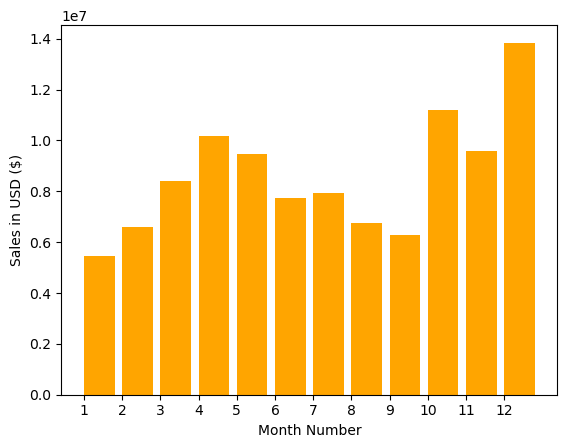

In [19]:
month = range(1,13)

plt.bar(month,results["Sales"],color="orange",align="edge")
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month Number")
plt.xticks(month)
plt.show()

Question 2: what city had the higest no of sales

In [20]:
results = all_data.groupby("City").sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta(GA),49806,8339724.60,314382,8386495.74
Austin(TX),33459,5429620.83,209487,5458745.25
Boston(MA),67584,10912229.31,423336,10984926.03
Dallas(TX),50190,8257883.46,313860,8303926.20
Los Angeles(CA),99867,16264305.69,624975,16357712.40
New York City(NY),83796,13906112.49,527223,13992952.29
Portland(ME),8250,1341567.75,51432,1349274.81
Portland(OR),33909,5581674.66,211863,5612197.02
San Francisco(CA),150717,24634385.22,946560,24786611.73


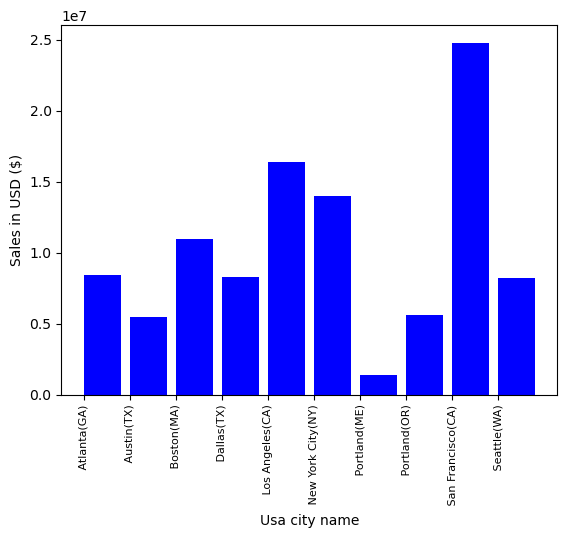

In [21]:
cities =[city for city,df in all_data.groupby("City")]

plt.bar(cities,results["Sales"],color="blue",align="edge")
plt.ylabel("Sales in USD ($)")
plt.xlabel("Usa city name")
plt.xticks(cities,rotation="vertical",size=8)
plt.show()

# Question 3:What time should we display advertisments to maximize likelihood of custmers's buying product?

In [22]:
all_data["Order Date"] =pd.to_datetime(all_data["Order Date"])

In [23]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)


In [24]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30


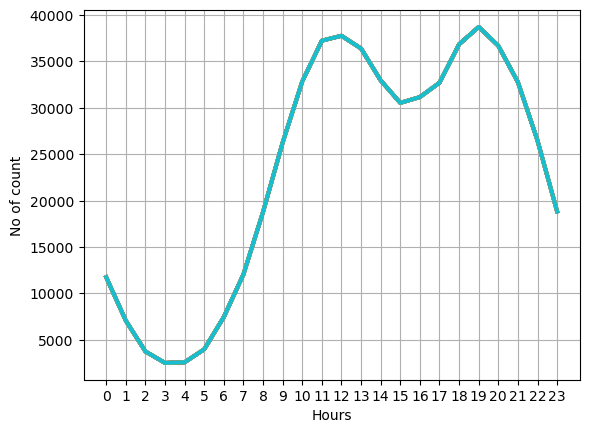

In [25]:
hours = [hour for hour,ddf in all_data.groupby("Hour")]
plt.plot(hours,all_data.groupby(["Hour"]).count(),linewidth=2.8)
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("No of count")
plt.grid()
plt.show()

the peak time to buy product is 11-12 am and 7pm (19)

# Question 4: What products are most often sold together

In [26]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30


In [27]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

In [28]:
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

In [29]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27,"Wired Headphones,Wired Headphones,Wired Headph..."


In [30]:
df = df[["Order ID","Grouped"]].drop_duplicates()

In [31]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key, value)

    

('USB-C Charging Cable', 'USB-C Charging Cable') 66141
('Lightning Charging Cable', 'Lightning Charging Cable') 65460
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 62355
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 62046
('Wired Headphones', 'Wired Headphones') 56961
('Apple Airpods Headphones', 'Apple Airpods Headphones') 46863
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 40218
('27in FHD Monitor', '27in FHD Monitor') 22602
('iPhone', 'iPhone') 20544
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 18735


# Question 5:What product sold the most? Why do you think it sold the most

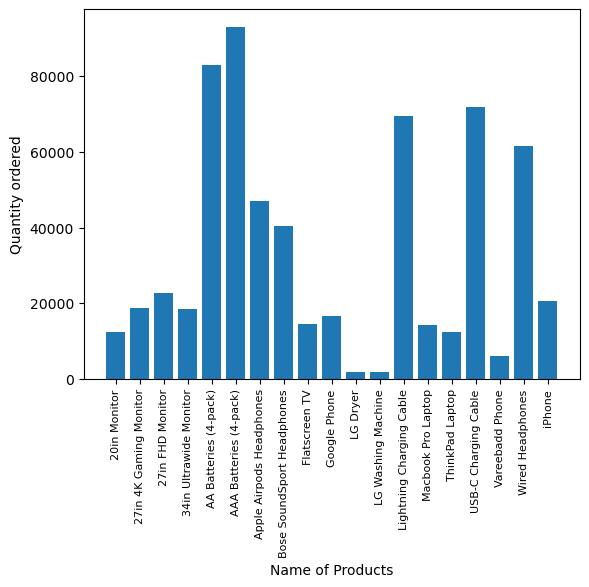

In [32]:
product_group = all_data.groupby("Product")

quantity_ordered = product_group.sum()["Quantity Ordered"]
products = [product for product,df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation="vertical",size=8)
plt.xlabel("Name of Products")
plt.ylabel("Quantity ordered")
plt.show()


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_17108\2413248521.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation="vertical",size=8)


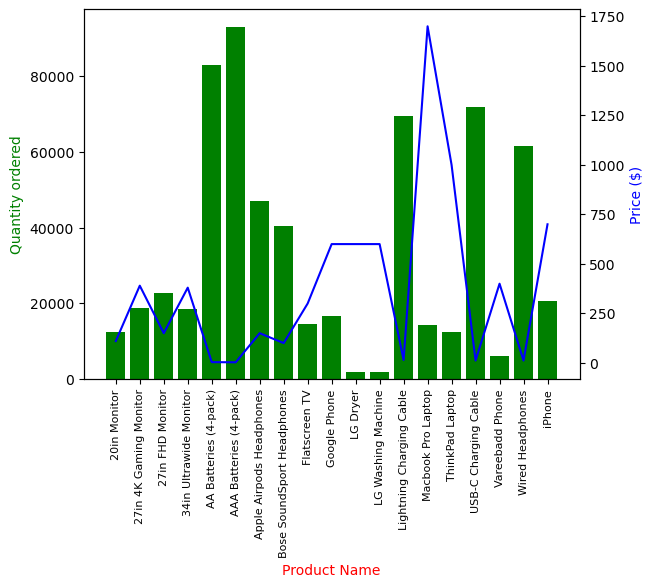

In [33]:
prices = all_data.groupby("Product").mean()["Price Each"]

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,"b-")
ax1.set_xlabel("Product Name",color="r")
ax1.set_ylabel("Quantity ordered",color="g")
ax2.set_ylabel("Price ($)",color="b")
ax1.set_xticklabels(products,rotation="vertical",size=8)
plt.show()

In [34]:
print("Completed...Thanks")

Completed...Thanks
